In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
df=pd.read_csv('Data_combine(final).csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (28,43,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Timestamp,devId_x,grId_x,runYn_x,sensor01_x,sensor02_x,devId_y,grId_y,runYn_y,...,acAS_y,acAT_y,hz,actKw_y,pwFact,ractKw_y,totKw,cur_power_value,cur_voltage_value,cur_current_value
0,349919,2022-02-06 23:59,440001.0,440.0,R,12.56,21.50,440002.0,440.0,R,...,8.68,14.26,60.03,6.58,0.70,4.66,NaN,NaN,NaN,NaN
1,349918,2022-02-06 23:58,440001.0,440.0,R,12.56,21.55,440002.0,440.0,R,...,8.80,8.20,60.02,4.96,0.65,4.65,NaN,NaN,NaN,NaN
2,349917,2022-02-06 23:57,440001.0,440.0,R,12.59,21.50,440002.0,440.0,R,...,8.83,7.57,60.03,4.76,0.65,4.60,NaN,NaN,NaN,NaN
3,349916,2022-02-06 23:56,440001.0,440.0,R,12.57,21.53,440002.0,440.0,R,...,8.86,7.63,60.00,4.84,0.65,4.58,NaN,NaN,NaN,NaN
4,349915,2022-02-06 23:55,440001.0,440.0,R,12.59,21.53,440002.0,440.0,R,...,9.25,7.49,59.98,4.83,0.66,4.56,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348475,4,2021-06-10 0:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348476,3,2021-06-10 0:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348477,2,2021-06-10 0:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348478,1,2021-06-10 0:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.index = pd.to_datetime(df['Timestamp'])
df= df.drop(['Timestamp'], axis=1)
df

,Unnamed: 0,devId_x,grId_x,runYn_x,sensor01_x,sensor02_x,devId_y,grId_y,runYn_y,sensor01_y,...,acAS_y,acAT_y,hz,actKw_y,pwFact,ractKw_y,totKw,cur_power_value,cur_voltage_value,cur_current_value
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-06 23:59:00,349919,440001.0,440.0,R,12.56,21.50,440002.0,440.0,R,19.62,...,8.68,14.26,60.03,6.58,0.70,4.66,NaN,NaN,NaN,NaN
2022-02-06 23:58:00,349918,440001.0,440.0,R,12.56,21.55,440002.0,440.0,R,19.65,...,8.80,8.20,60.02,4.96,0.65,4.65,NaN,NaN,NaN,NaN
2022-02-06 23:57:00,349917,440001.0,440.0,R,12.59,21.50,440002.0,440.0,R,19.63,...,8.83,7.57,60.03,4.76,0.65,4.60,NaN,NaN,NaN,NaN
2022-02-06 23:56:00,349916,440001.0,440.0,R,12.57,21.53,440002.0,440.0,R,19.62,...,8.86,7.63,60.00,4.84,0.65,4.58,NaN,NaN,NaN,NaN
2022-02-06 23:55:00,349915,440001.0,440.0,R,12.59,21.53,440002.0,440.0,R,19.65,...,9.25,7.49,59.98,4.83,0.66,4.56,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-10 00:04:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-10 00:03:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-10 00:02:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#10분 단위
df1 = df.resample(rule='1D').mean()
df1

,Unnamed: 0,devId_x,grId_x,sensor01_x,sensor02_x,devId_y,grId_y,sensor01_y,sensor02_y,devId_x.1,...,acAS_y,acAT_y,hz,actKw_y,pwFact,ractKw_y,totKw,cur_power_value,cur_voltage_value,cur_current_value
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-06-10,719.5,440001.0,440.0,27.930634,57.443310,440002.0,440.0,22.060540,74.974930,211001.0,...,20.443451,22.095915,60.005211,12.998146,-0.638521,-3.002535,NaN,NaN,NaN,NaN
2021-06-11,2159.5,440001.0,440.0,25.736979,64.012035,440002.0,440.0,22.573229,74.467743,211001.0,...,25.340556,29.899764,59.998201,16.784111,-0.223528,-0.866667,NaN,NaN,NaN,NaN
2021-06-12,3599.5,440001.0,440.0,26.186701,63.454181,440002.0,440.0,22.293167,77.116021,211001.0,...,11.867792,13.101285,59.994486,5.905514,-0.364868,0.089549,NaN,NaN,NaN,NaN
2021-06-13,5039.5,440001.0,440.0,25.466611,63.948764,440002.0,440.0,22.403257,75.955715,211001.0,...,7.817007,7.515368,60.003007,3.324972,-0.522944,-3.076014,NaN,NaN,NaN,NaN
2021-06-14,6479.5,440001.0,440.0,25.254917,60.548500,440002.0,440.0,22.564049,72.414153,211001.0,...,25.024514,30.350729,59.997611,16.456875,-0.023625,1.723146,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02,343439.5,440001.0,440.0,12.592146,28.689938,440002.0,440.0,18.523187,20.432986,211001.0,...,8.561819,8.321375,60.000118,5.114604,0.765625,3.823958,NaN,NaN,NaN,NaN
2022-02-03,344879.5,440001.0,440.0,18.802972,19.953375,440002.0,440.0,19.315708,19.585292,211001.0,...,25.967993,25.564563,60.000819,16.582271,0.182354,1.709451,NaN,NaN,NaN,NaN
2022-02-04,346319.5,440001.0,440.0,20.963451,15.991590,440002.0,440.0,19.971431,18.037097,211001.0,...,23.926292,22.257424,59.999479,15.413160,0.320424,2.420743,NaN,NaN,NaN,NaN


In [31]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
#기술통계량
df.describe()
#mean: 평균값, std: 표준편차

,Unnamed: 0,devId_x,grId_x,sensor01_x,sensor02_x,devId_y,grId_y,sensor01_y,sensor02_y,devId_x.1,...,acAS_y,acAT_y,hz,actKw_y,pwFact,ractKw_y,totKw,cur_power_value,cur_voltage_value,cur_current_value
count,348480.000000,338716.0,338716.0,338716.000000,338716.000000,338713.0,338713.0,338713.000000,338713.000000,334643.0,...,332416.000000,332416.000000,332416.000000,332416.000000,332416.000000,332416.000000,0.0,0.0,0.0,0.0
mean,175554.541322,440001.0,440.0,23.575900,46.267948,440002.0,440.0,21.269054,54.513373,211001.0,...,22.098774,24.387428,59.999553,13.817293,-0.461455,-0.506072,NaN,NaN,NaN,NaN
std,100795.930126,0.0,0.0,5.678313,17.764933,0.0,0.0,1.719205,25.388869,0.0,...,23.161949,26.367053,0.019401,15.085960,0.716262,8.424767,NaN,NaN,NaN,NaN
min,0.000000,440001.0,440.0,7.660000,7.320000,440002.0,440.0,9.600000,7.340000,211001.0,...,3.660000,3.530000,59.890000,-3.140000,-1.000000,-18.740000,NaN,NaN,NaN,NaN
25%,88559.750000,440001.0,440.0,18.970000,32.860000,440002.0,440.0,20.180000,29.290000,211001.0,...,7.950000,7.540000,59.990000,4.210000,-0.890000,-3.840000,NaN,NaN,NaN,NaN
50%,175679.500000,440001.0,440.0,25.450000,49.620000,440002.0,440.0,21.250000,61.340000,211001.0,...,10.590000,11.380000,60.000000,6.150000,-0.800000,-3.140000,NaN,NaN,NaN,NaN
75%,262799.250000,440001.0,440.0,27.910000,60.910000,440002.0,440.0,22.220000,79.290000,211001.0,...,30.040000,33.000000,60.010000,19.810000,-0.670000,-1.750000,NaN,NaN,NaN,NaN
max,349919.000000,440001.0,440.0,35.320000,90.380000,440002.0,440.0,33.620000,93.090000,211001.0,...,243.170000,255.900000,60.130000,130.100000,1.000000,99.170000,NaN,NaN,NaN,NaN


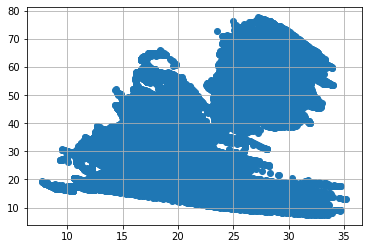

In [25]:
# plt.scatter(df_resample.index,df_resample['soc'])
plt.scatter(df1['sensor01_x'],df1['sensor02_x'])
plt.grid()
plt.show()

In [20]:
df_resample.corr()

,Unnamed: 0,devId_x,grId_x,sensor01_x,sensor02_x,devId_y,grId_y,sensor01_y,sensor02_y,devId_x.1,...,acAS_y,acAT_y,hz,actKw_y,pwFact,ractKw_y,totKw,cur_power_value,cur_voltage_value,cur_current_value
Unnamed: 0,1.000000,NaN,NaN,-0.646994,-0.820025,NaN,NaN,-0.478469,-0.906867,NaN,...,-0.042351,-0.044713,-0.022747,-0.009113,0.129872,-0.101997,NaN,NaN,NaN,NaN
devId_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grId_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor01_x,-0.646994,NaN,NaN,1.000000,0.465898,NaN,NaN,0.382054,0.700306,NaN,...,0.206218,0.189021,0.029751,0.190842,-0.012546,0.073137,NaN,NaN,NaN,NaN
sensor02_x,-0.820025,NaN,NaN,0.465898,1.000000,NaN,NaN,0.441141,0.884912,NaN,...,-0.185278,-0.173931,0.001330,-0.211559,-0.268969,-0.071549,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ractKw_y,-0.101997,NaN,NaN,0.073137,-0.071549,NaN,NaN,0.052976,0.102189,NaN,...,0.754701,0.732712,0.041877,0.711624,0.737881,1.000000,NaN,NaN,NaN,NaN
totKw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cur_power_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cur_voltage_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#월별 상관계수
pr_m = pd.period_range(start = '2021-04',
                       end= None,
                       periods =10,
                      freq= 'M')
pr_m


PeriodIndex(['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
             '2021-10', '2021-11', '2021-12', '2022-01'],
            dtype='period[M]')

In [ ]:
res = ols('maxTemp~soc', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                maxTemp   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                 7.458e+04
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        04:59:23   Log-Likelihood:            -7.8570e+05
No. Observations:              351829   AIC:                         1.571e+06
Df Residuals:                  351827   BIC:                         1.571e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8565      0.006   3473.004      0.000      20.845      20.868
soc            0.0631      0.000    273.088      0.000       0.063       0.064
==============================================================================
Omnibus:                     6720.463   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7249.280
Skew:                           0.325   Prob(JB):                         0.00
Kurtosis:                       3.266   Cond. No.                         41.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""